분류 성능비교
==

다루는 내용
--
- 분류 알고리즘 비교
- 교차검증
- 정적 성능평가 Confusion matrix  
- 동적 성능평가 ROC

데이터
--
- 포도주 품질 분류 https://goo.gl/Gyc8K7

출처
--
https://www.kaggle.com/vishalyo990/prediction-of-quality-of-wine/notebook



모듈 불러오기
--

In [1]:
import pandas as pd
import numpy as np
# import seaborn as sns
import matplotlib.pyplot as plt

#트리
from sklearn import tree

#최근접 이웃
from sklearn.neighbors import KNeighborsClassifier

#앙상블
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
#from xgboost import XGBClassifier <- pip install xgboost

#서포트 벡터 분류, 회귀
from sklearn.svm import SVC
from sklearn.svm import SVR # Support Vector Regression

#선형 모델
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression

from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

#전처리
from sklearn.preprocessing import StandardScaler, LabelEncoder


from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score 
%matplotlib inline

import matplotlib
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname='c:/Windows/Fonts/NanumBarunGothic.ttf').get_name()
rc('font',family=font_name)

matplotlib.rcParams['axes.unicode_minus'] = False 

데이터 읽기 (포도주 품질 평가)
--

In [2]:
wine = pd.read_csv('data/winequality-red.csv')
# 데이터 사본 https://goo.gl/m3eCrf

In [3]:
wine.head(5)
# 데이터 위에서 5개만 출력

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
wine.shape

(1599, 12)

- fixed acidity - 결합 산도 
- volatile acidity - 휘발성 산도 
- citric acid - 시트르산 
- residual sugar - 잔류 설탕 
- chlorides	 - 염화물 
- free sulfur dioxide - 자유 이산화황 
- total sulfur dioxide - 총 이산화황 
- density - 밀도 
- pH - pH 
- sulphates - 황산염 
- alcohol - 알코올 
- quality - 품질 (0 ~ 10 점)

In [5]:
np.unique(wine.quality)

array([3, 4, 5, 6, 7, 8], dtype=int64)

In [6]:
wine.info() # 데이터 정보

# 특성 12개. 데이터 샘플 1599개

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [7]:
wine.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

## 여러 특성 한번에 보기 (박스 플롯)

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 [Text(1, 0, 'fixed acidity'),
  Text(2, 0, 'volatile acidity'),
  Text(3, 0, 'citric acid'),
  Text(4, 0, 'residual sugar'),
  Text(5, 0, 'chlorides'),
  Text(6, 0, 'free sulfur dioxide'),
  Text(7, 0, 'total sulfur dioxide'),
  Text(8, 0, 'density'),
  Text(9, 0, 'pH'),
  Text(10, 0, 'sulphates'),
  Text(11, 0, 'alcohol'),
  Text(12, 0, 'quality')])

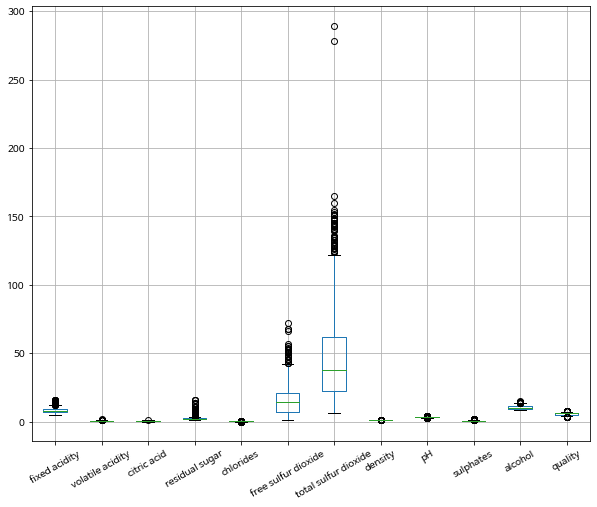

In [8]:
#맨처음에 박스플롯을 그린다 거의 한눈에 다보여주기 때문에
wine.boxplot(figsize = (10,8))
plt.xticks(rotation=30)

free sulfur, total sulfur의 값이 크고 이상치도 매우 높다

줄여서 보기
--

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(1, 0, 'fixed acidity'),
  Text(2, 0, 'volatile acidity'),
  Text(3, 0, 'citric acid'),
  Text(4, 0, 'residual sugar'),
  Text(5, 0, 'chlorides'),
  Text(6, 0, 'density'),
  Text(7, 0, 'pH'),
  Text(8, 0, 'sulphates'),
  Text(9, 0, 'alcohol'),
  Text(10, 0, 'quality')])

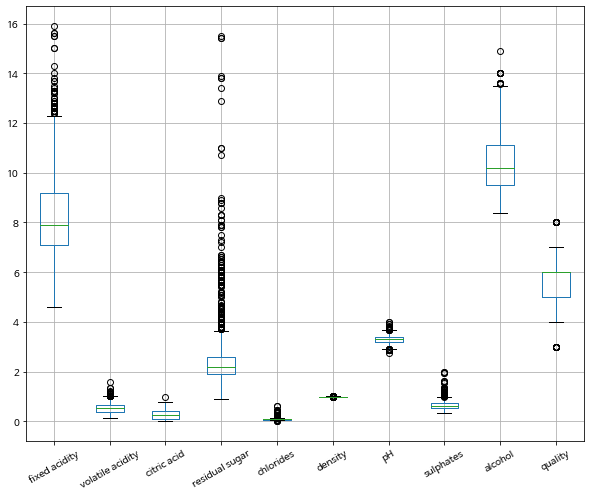

In [9]:
#위에서 크게나온 그림 빼고 다시그림 다른것들을 자세히 보기위해서
wine.drop(['free sulfur dioxide', 'total sulfur dioxide'], axis=1).boxplot(figsize = (10,8))
plt.xticks(rotation=30)

위의 차이가 심한 두 가지 특성을 빼고 다시 그린 박스플롯

- fixed acidity와 alcohol의 값이 비교적 큼
- residual sugar의 이상치가 매우 많음

cancer데이터에 데이터프레임을 입히고 0,1열을 지움

In [10]:
wine[['alcohol', 'quality']].head(10)

,alcohol,quality
0,9.4,5
1,9.8,5
2,9.8,5
3,9.8,6
4,9.4,5
5,9.4,5
6,9.4,5
7,10.0,7
8,9.5,7
9,10.5,5


알콜과 품질에 대해 10가지 row

<AxesSubplot:>

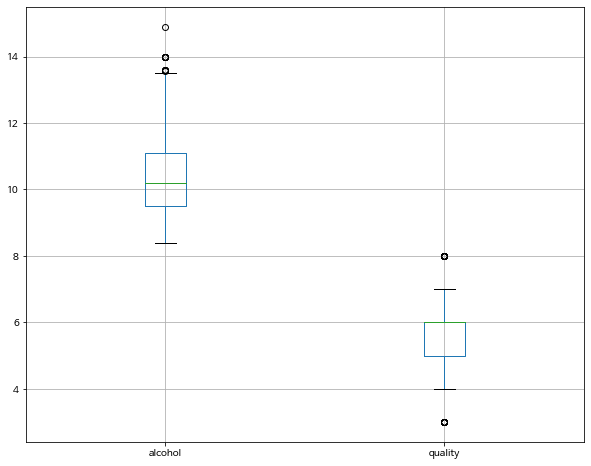

In [11]:
wine[['alcohol', 'quality']].boxplot(figsize = (10,8))

두 특성만 박스플롯으로 표현. 

히스토그램
--

array([[<AxesSubplot:title={'center':'alcohol'}>,
        <AxesSubplot:title={'center':'quality'}>]], dtype=object)

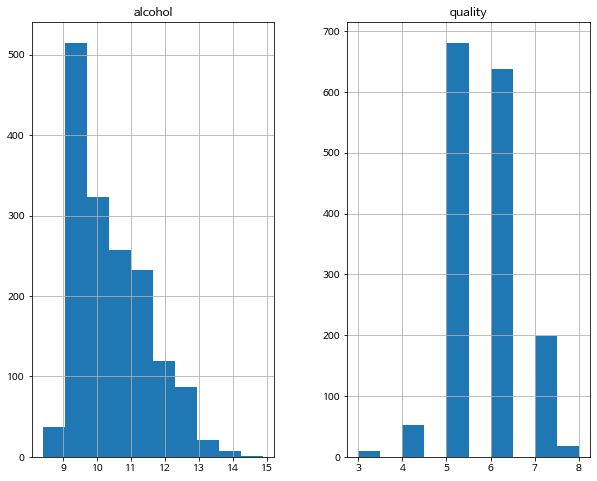

In [12]:
wine[['alcohol', 'quality']].hist(figsize = (10,8))

히스토그램으로 표현함

- 알콜은 9, 10사이가 가장 많고 품질은 5, 6 이 가장 많다

품질관련 데이터 파악
--

<AxesSubplot:title={'center':'alcohol'}, xlabel='[quality]'>

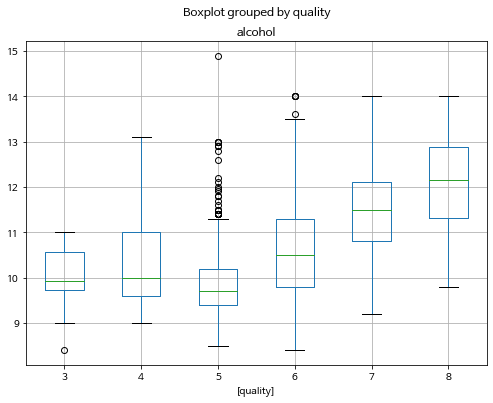

In [13]:
#퀄리티가 3인것만 모아서 그리고 4만모아서 그리고...
wine[['alcohol', 'quality']].boxplot(by='quality',figsize = (8,6)) # by값 - 기준
#quality가 좋은건 평균적으로 알코올 성분이 좋다.
#포도주도 알코올이 있는것들을 좋아함

array([<AxesSubplot:title={'center':'chlorides'}, xlabel='[quality]'>,
       <AxesSubplot:title={'center':'citric acid'}, xlabel='[quality]'>],
      dtype=object)

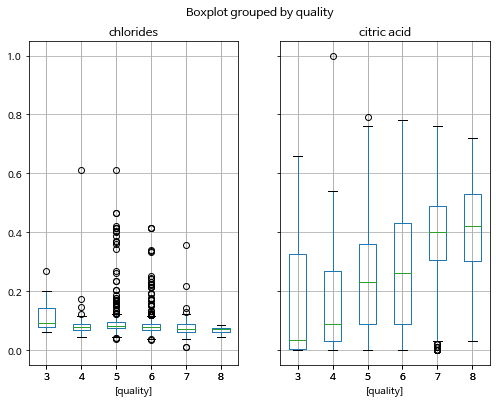

In [14]:
#chlorides : 염화물 , citric acid : 시트르산
wine1 = wine[[ 'chlorides', 'citric acid', 'quality']]
wine1.boxplot(by='quality',figsize = (8,6))

품질에 의해 표현된 염화물과 시트르산.

- 품질이 높을수록 시트르산도 높음
- 염화물은 큰 차이가 없었다

<AxesSubplot:title={'center':'chlorides'}, xlabel='[citric acid]'>

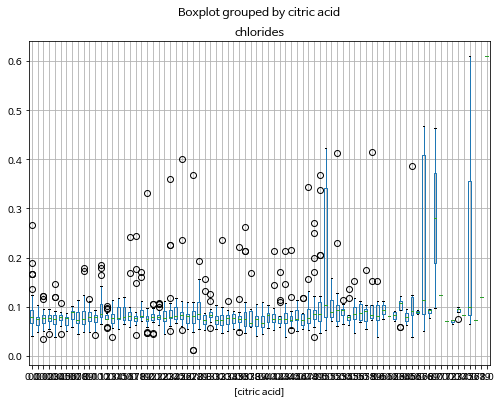

In [15]:
#chlorides : 염화물 , citric acid : 시트르산
wine1 = wine[[ 'chlorides', 'citric acid']]
wine1.boxplot(by='citric acid',figsize = (8,6))

염화물과 시트르산.. 염화물은 값의 분산이 크지 않은 것을 확인할 수 있다.

In [16]:
np.std(wine.chlorides)

0.04705058260331576

In [17]:
np.std(wine['citric acid'])

0.1947402144523329

염화물과 시트르산의 표준편차 .  관찰한 결과와 같이 시트르산의 분산이 더 큼

array([[<AxesSubplot:title={'center':'alcohol'}, xlabel='[quality]'>,
        <AxesSubplot:title={'center':'chlorides'}, xlabel='[quality]'>,
        <AxesSubplot:title={'center':'citric acid'}, xlabel='[quality]'>],
       [<AxesSubplot:title={'center':'density'}, xlabel='[quality]'>,
        <AxesSubplot:title={'center':'fixed acidity'}, xlabel='[quality]'>,
        <AxesSubplot:title={'center':'free sulfur dioxide'}, xlabel='[quality]'>],
       [<AxesSubplot:title={'center':'pH'}, xlabel='[quality]'>,
        <AxesSubplot:title={'center':'residual sugar'}, xlabel='[quality]'>,
        <AxesSubplot:title={'center':'sulphates'}, xlabel='[quality]'>],
       [<AxesSubplot:title={'center':'total sulfur dioxide'}, xlabel='[quality]'>,
        <AxesSubplot:title={'center':'volatile acidity'}, xlabel='[quality]'>,
        <AxesSubplot:>]], dtype=object)

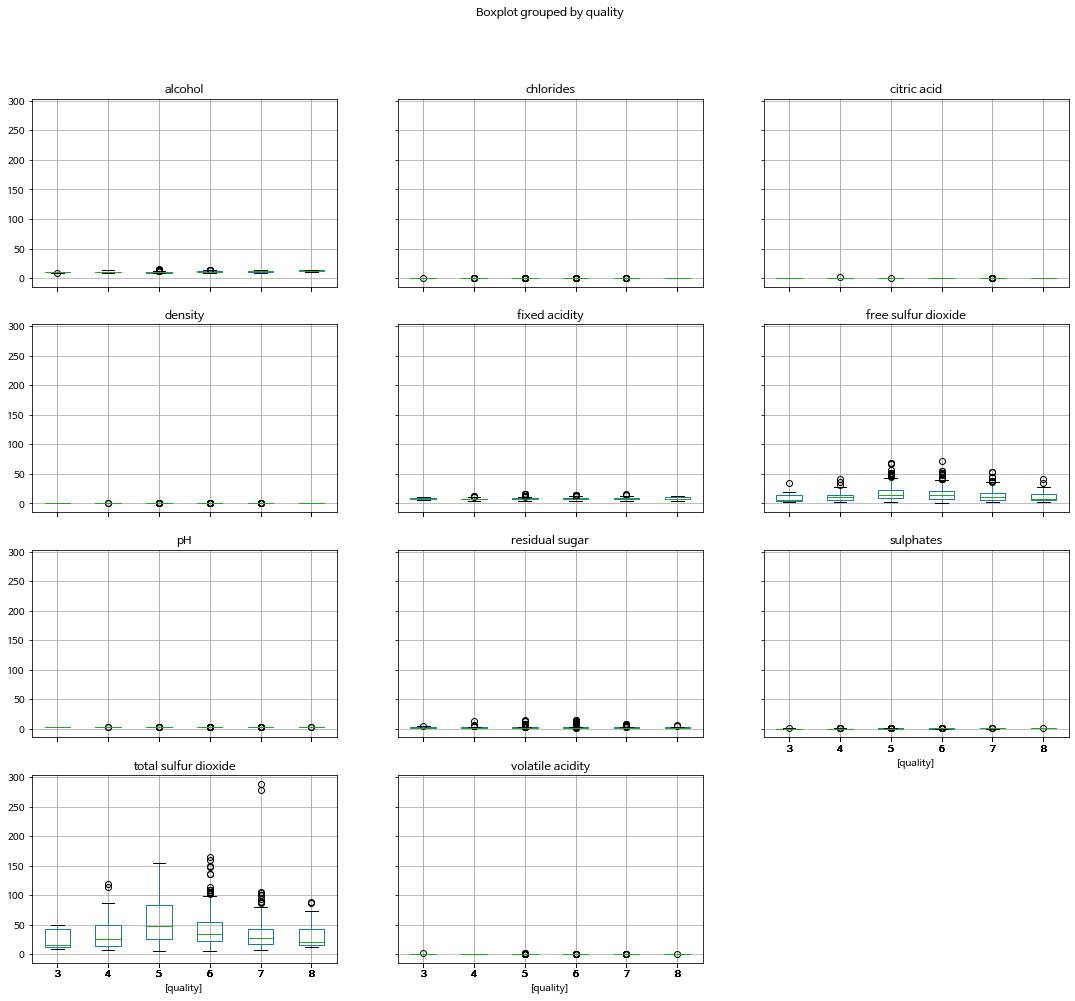

In [18]:
wine.boxplot(by='quality',figsize = (18,16))

품질에 따른 특성들 값.

free sulfur dioxide과 total sulfur dioxide에 크게 값의 차이가 있다

array([[<AxesSubplot:title={'center':'alcohol'}, xlabel='[quality]'>,
        <AxesSubplot:title={'center':'chlorides'}, xlabel='[quality]'>,
        <AxesSubplot:title={'center':'citric acid'}, xlabel='[quality]'>],
       [<AxesSubplot:title={'center':'density'}, xlabel='[quality]'>,
        <AxesSubplot:title={'center':'fixed acidity'}, xlabel='[quality]'>,
        <AxesSubplot:title={'center':'pH'}, xlabel='[quality]'>],
       [<AxesSubplot:title={'center':'residual sugar'}, xlabel='[quality]'>,
        <AxesSubplot:title={'center':'sulphates'}, xlabel='[quality]'>,
        <AxesSubplot:title={'center':'volatile acidity'}, xlabel='[quality]'>]],
      dtype=object)

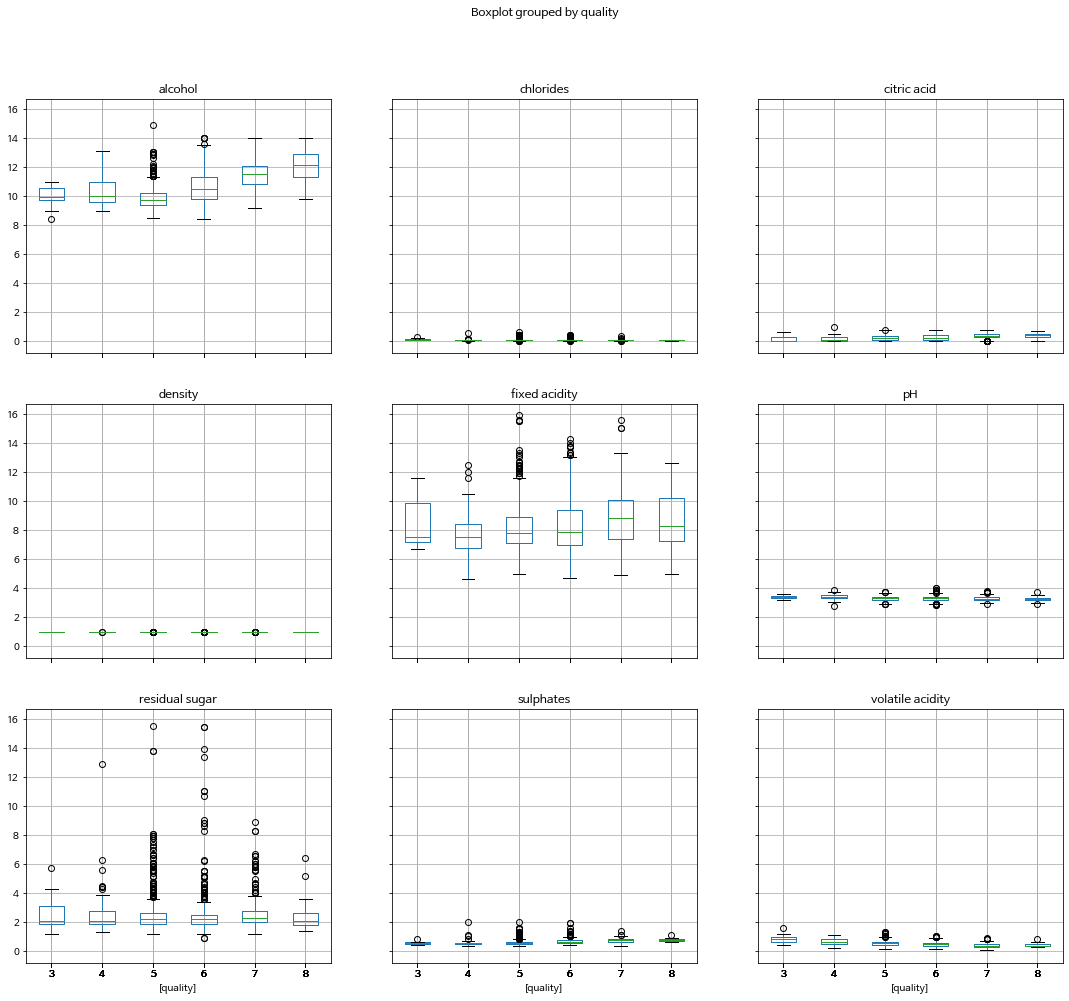

In [19]:
wine.drop(['free sulfur dioxide', 'total sulfur dioxide'], axis=1).boxplot(by='quality',figsize = (18,16))

위에서 언급한 두 가지 특성을 제외하고 다시 그린 박스플롯

alcohol, fixed acidity, residual sugar이 크게 나타남

array([[<AxesSubplot:title={'center':'chlorides'}, xlabel='[quality]'>,
        <AxesSubplot:title={'center':'citric acid'}, xlabel='[quality]'>],
       [<AxesSubplot:title={'center':'density'}, xlabel='[quality]'>,
        <AxesSubplot:title={'center':'sulphates'}, xlabel='[quality]'>],
       [<AxesSubplot:title={'center':'volatile acidity'}, xlabel='[quality]'>,
        <AxesSubplot:>]], dtype=object)

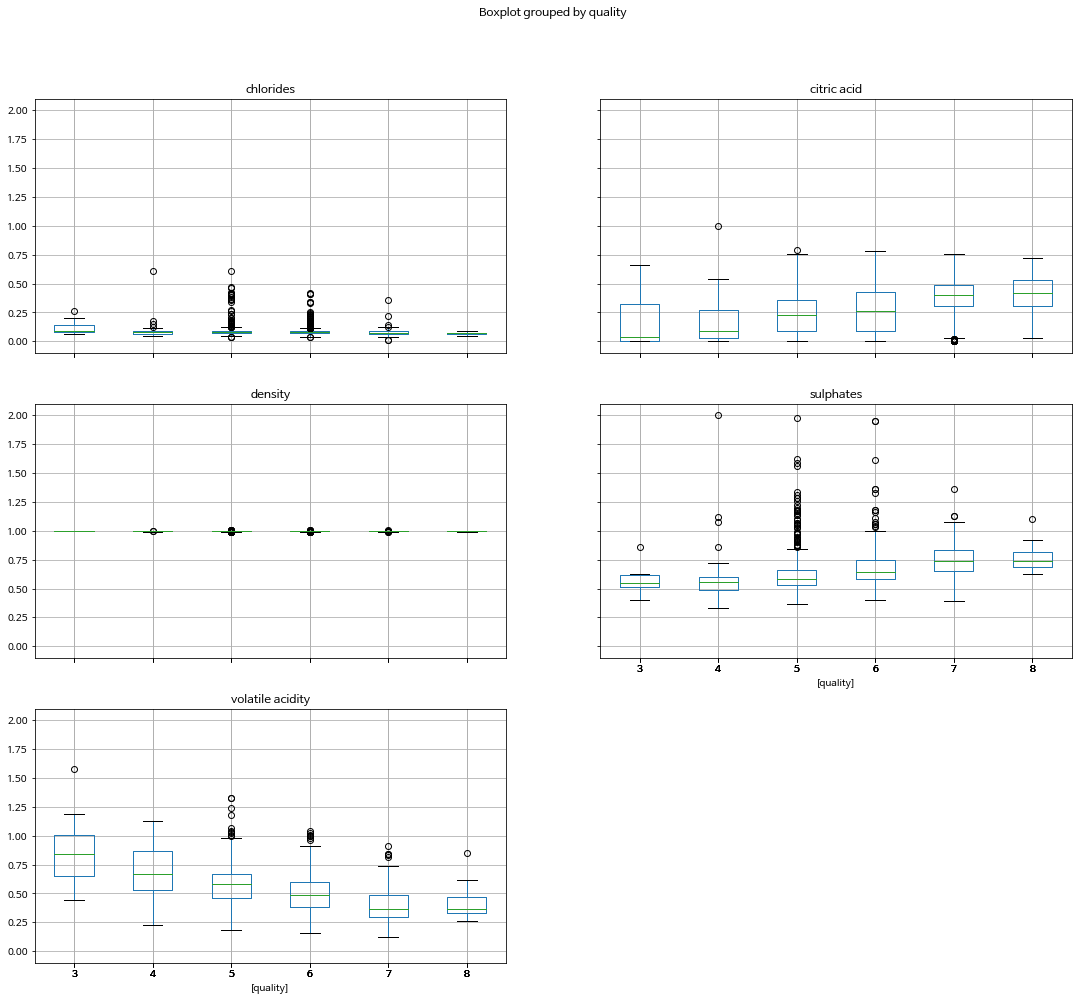

In [20]:
wine.drop(['free sulfur dioxide', 'total sulfur dioxide','alcohol','fixed acidity','residual sugar','pH'], axis=1).boxplot(by='quality',figsize = (18,16))

위에 나타난 것들 전부 제외하고 그림.

- critric acid(시트르산), sulphates(황산염)은 품질이 커질수록 증가
- volatile acidity(휘발성 산도)는 품질이 커질수록 감소
- chlorides(염화물)과 density(밀도)는 거의 영향이 없다

array([<AxesSubplot:title={'center':'chlorides'}, xlabel='[quality]'>,
       <AxesSubplot:title={'center':'density'}, xlabel='[quality]'>],
      dtype=object)

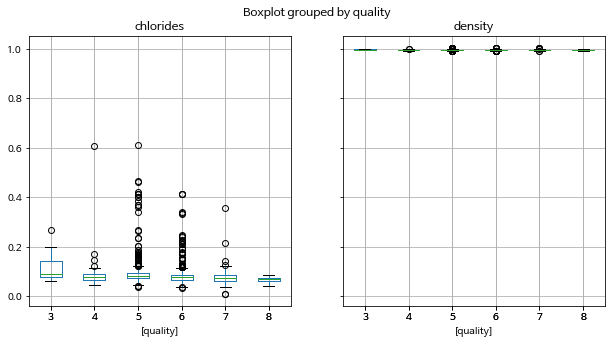

In [21]:
wine[['quality', 'chlorides', 'density']].boxplot(by='quality', figsize=(10,5))

chlorides는 품질이 커질수록 조금씩 감소하는 형태

In [22]:
np.min(wine.density)

0.99007

In [23]:
np.max(wine.density)

1.00369

density의 값의 범위가 좁은 편임을 확인

기본 값의 범위가 큰 것은
- free sulfur dioxide, total sulfur dioxide
- alcohol, fixed acidity, residual sugar
- critric acid, sulphates, volatile acidity
- chlorides
- density

순이다

## 데이터 전처리 (레이블 만들기)

In [24]:
wine['quality'].unique()

# = wine.quality.unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

품질은 3부터 8까지의 데이터가 존재한다

In [25]:
wine['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

- wine이 dataframe 형식이기 때문에 value_counts()로 빈도 계산이 가능하다
- 품질에 대한 빈도 조사.. 
- 5~6이 가장 많음

In [195]:
# 품질이 좋고 나쁜 것을 나누는 기준 설정
# 6.5를 기준으로 bad(0) good(1)으로 나눈다 (임의로 나눈 것임)
bins = (2.9, 6.5, 8.1)
#bins 구간을 나눌때 쓴다.(마지막에 8을썼더니 컴퓨터나 8을 뺴버렸다. 그래서 8을 포함시키기 위해 안전하게 8.1을 사용)
#8만 잡게하면 성능이 좋아진다.
group_names = [0, 1]
wine['qual'] = pd.cut(wine['quality'], bins = bins, labels = group_names) #cut 함수 2.9 초과 6.5 이하, 6.5 초과 8.1 이하로 범위를 나눠줌

qual이라는 새 특성으로 quality를  2.9-6.5는 0 / 6.5-8.1은 1로 나눔

pandas로 cut해서 0, 1로 라벨링

In [27]:
wine.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,qual
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0


qual이란 특성이 추가됨

In [28]:
wine['qual'].value_counts()

0    1382
1     217
Name: qual, dtype: int64

- 2.9~6.5는 1382개
- 6.5~8.1은 217개로 나뉨

In [197]:
# 예측변수와 레이블을 나눈다
# X 데이터에서는 'quality'와 'qual' 컬럼 제거
# y는 레이블만 담는다

X_new = wine.drop(['quality', 'qual'], axis = 1)
y_ = wine['quality'] # regression 용
y = wine['qual'] 

In [30]:
X_new.head(5)

#quality와 qual이 빠진 데이터셋

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [31]:
y.value_counts()

# = wine['qual'].value_counts()

0    1382
1     217
Name: qual, dtype: int64

표준 스케일링
--

전체 자료의 분포를 평균 0, 분산 1이 되도록 만든다.  
X에는 수치 데이터만 들어야 한다.  
테스트 데이터도 같이 스케일링하는 것을 잊지 않는다

In [198]:
# 데이터를 랜덤하게 섞은 후 80%를 훈련데이터로 사용
# random_state 같은 값으로 지정하면 랜덤하게 섞이는 순서가 같다.
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size = 0.2, random_state = 7) # 분류용 = qual
X_train_, X_test_, y_train_, y_test_ = train_test_split(X_new, y_, test_size = 0.2, random_state = 7) # 회귀용 = quality

#직접 실습을 해보는데 지금은 80%이지만 다르게 할 수도 있다.
#위에 모델을 바꿔서 6.5가 맛있다가 아니라 8만 맛있다 등 바꿔본다.

In [33]:
X_train.shape, y_train.shape

((1279, 11), (1279,))

In [34]:
X_test.shape, y_test.shape

((320, 11), (320,))

In [35]:
sc = StandardScaler().fit(X_train)

X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

X_train_ = sc.transform(X_train_)
X_test_ = sc.transform(X_test_)



#fit을 하고 transform을 한번에 한것, 코드를 줄여주기 위해서
#fit은 데이터를 읽고 평균과 시그마를 구한다. (하나의 모델을 만듬, 여기에 들어가는 파라미터가 평균과 시그마) -> 스케일링 하기위한 상수구하기
#transform은 실제 값들을 넣어서 나오는 값들

#원래는 데이터를 자체적으로 나눠서 cross valredation을 해야한다. 하지만 지금은 통으로했다.

1279 : 320로 훈련 : 테스트 데이터 셋으로 나뉨

# 1. 분류

## KNN(K-최근접 이웃)

0.9033373112217604
0.8824013157894737


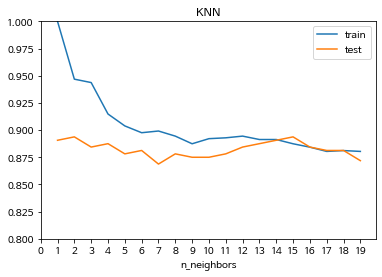

In [36]:
#clf = KNeighborsClassifier(n_neighbors=3)
#clf = clf.fit(X_train, y_train)
#clf.score(X_test,y_test)

rang = range(1,20)
score_train = []
score_test = []

for k in rang:
    knn = KNeighborsClassifier(n_neighbors=k).fit(X_train, y_train)
    score_train.append(knn.score(X_train, y_train))
    score_test.append(knn.score(X_test, y_test))
    
plt.plot(rang, score_train, label='train')
plt.plot(rang, score_test, label='test')
plt.legend()
plt.xlabel("n_neighbors")
plt.ylim(0.8,1)
plt.xticks(range(0,20))
plt.title("KNN")

print(np.array(score_train).mean())
print(np.array(score_test).mean())

이웃수가 늘어날수록 훈련데이터의 과적합 정도가 풀림

테스트 데이터의 경우는 비슷한 정확도를 보인다

1.0
0.9001644736842105


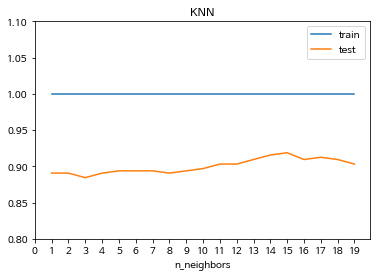

In [37]:
#clf = KNeighborsClassifier(n_neighbors=3)
#clf = clf.fit(X_train, y_train)
#clf.score(X_test,y_test)

rang = range(1,20)
score_train = []
score_test = []

for k in rang:
    knn = KNeighborsClassifier(n_neighbors=k, weights='distance').fit(X_train, y_train)
    score_train.append(knn.score(X_train, y_train))
    score_test.append(knn.score(X_test, y_test))
    
plt.plot(rang, score_train, label='train')
plt.plot(rang, score_test, label='test')
plt.legend()
plt.xlabel("n_neighbors")
plt.ylim(0.8,1.1)
plt.title("KNN")
plt.xticks(range(0,20))


print(np.array(score_train).mean())
print(np.array(score_test).mean())

- 이웃 거리에 가중치를 주어서 테스트 한 결과. 훈련 데이터는 다 과적합.
- 클래스별로 가깝게 밀집되어 있어서 그 영향을 많이 받는 것 같다

결정 트리 (Decesion Tree)
--

0.965285379202502
0.86265625


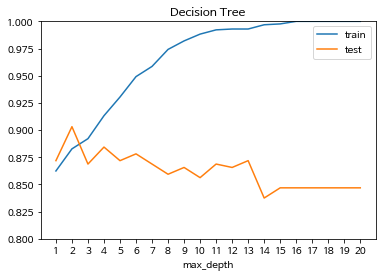

In [38]:
rang = range(1,21)
score_train = []
score_test = []
for d in rang:
    clf = tree.DecisionTreeClassifier(max_depth=d,random_state=0).fit(X_train, y_train)
    score_train.append(clf.score(X_train, y_train))
    score_test.append(clf.score(X_test, y_test))
    
plt.plot(rang, score_train, label='train')
plt.plot(rang, score_test, label='test')
plt.legend()
plt.xlabel("max_depth")
plt.ylim(0.8,1)
plt.title("Decision Tree")
plt.xticks(range(1,21))

print(np.array(score_train).mean())
print(np.array(score_test).mean())

최대 깊이가 커질수록 훈련 데이터는 과적합됨

테스트 데이터는 반대로 2에서 가장 높은 성능을 보이고 살짝 떨어짐

깊이 2로 자른 트리에서 데이터가 잘 분류됐던 모양임

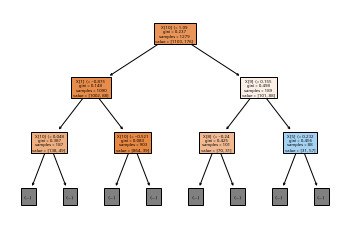

In [39]:
from sklearn.tree import plot_tree

dt = tree.DecisionTreeClassifier(random_state=0).fit(X_train, y_train)
plot_tree(dt, max_depth=2, filled=True)
plt.show()

#깊이 2에서의 트리

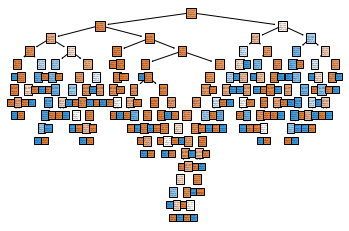

In [40]:
dt = tree.DecisionTreeClassifier(random_state=0).fit(X_train, y_train)
plot_tree(dt, max_depth=16, filled=True)
plt.show()

#16에서의 트리


16일때 전부 순수리프노드다

In [41]:
dt = tree.DecisionTreeClassifier(max_depth = 15,random_state=0).fit(X_train, y_train)
print(dt.score(X_train, y_train))

dt = tree.DecisionTreeClassifier(max_depth = 16,random_state=0).fit(X_train, y_train)
print(dt.score(X_train, y_train))

# max_depth에 따른 훈련 데이터 정확도. 16에서 1로 완전과적합됨

0.9976544175136826
1.0


In [42]:
# wine의 중요도 함수
def plot_feature_importances_wine(model):
    n_features = 11
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), wine.columns[:11])
    plt.xlabel("특성 중요도")
    plt.ylabel("특성")
    plt.ylim(-1, n_features)
    plt.xlim(0,1)
    plt.grid()

3


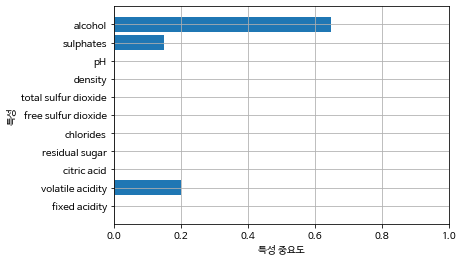

In [43]:
dt = tree.DecisionTreeClassifier(max_depth = 2,random_state=0).fit(X_train, y_train)

print(np.sum(dt.feature_importances_!=0))

plot_feature_importances_wine(dt)

알코올의 중요도가 가장 높다

11


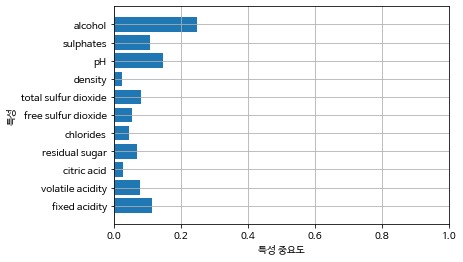

In [44]:
dt = tree.DecisionTreeClassifier(max_depth = 16,random_state=0).fit(X_train, y_train)

print(np.sum(dt.feature_importances_!=0))

plot_feature_importances_wine(dt)

깊이를 늘려서 뽑은 특성 중요도. 역시 알코올이 가장 높고 리프 노드까지 갔기 때문에 모든 특성이 다 사용됐다

0.9589132134480064
0.8796874999999998


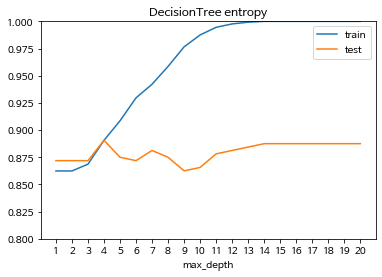

In [45]:
rang = range(1,21)
score_train = []
score_test = []
for d in rang:
    clf = tree.DecisionTreeClassifier(random_state=0, max_depth=d, criterion='entropy').fit(X_train, y_train)
    score_train.append(clf.score(X_train, y_train))
    score_test.append(clf.score(X_test, y_test))
    
plt.plot(rang, score_train, label='train')
plt.plot(rang, score_test, label='test')
plt.legend()
plt.xlabel("max_depth")
plt.ylim(0.8,1)
plt.title("DecisionTree entropy")
plt.xticks(range(1,21))

print(np.array(score_train).mean())
print(np.array(score_test).mean())

엔트로피로 손실 계산을 했을땐 지니지수보다 테스트 세트 점수가 차이가 크지 않다

In [199]:
df = tree.DecisionTreeClassifier(max_depth=2,random_state=0).fit(X_train, y_train)

confusion_matrix( y_test, df.predict(X_test))


array([[271,   8],
       [ 23,  18]], dtype=int64)

In [200]:
df = tree.DecisionTreeClassifier(max_depth=16,random_state=0).fit(X_train, y_train)
confusion_matrix( y_test, df.predict(X_test))


array([[246,  33],
       [ 16,  25]], dtype=int64)

혼돈 행렬 결과

## 랜덤 포래스트 (Random Forest Classifier)

0.9524181838489892
0.8745535714285715


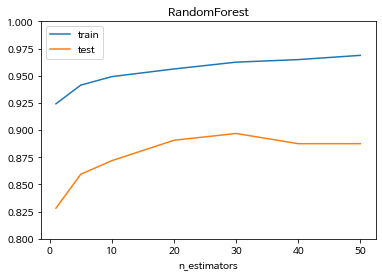

In [48]:
rang = [1,5,10,20,30,40,50]
score_train = []
score_test = []
for n in rang:
    rfc = RandomForestClassifier(max_depth=7, n_estimators=n, random_state=0).fit(X_train, y_train)
   
    score_train.append(rfc.score(X_train, y_train))
    score_test.append(rfc.score(X_test, y_test))
    
plt.plot(rang, score_train, label='train')
plt.plot(rang, score_test, label='test')
plt.ylim(0.8,1)
plt.legend()
plt.title("RandomForest")

plt.xlabel("n_estimators")

print(np.array(score_train).mean())
print(np.array(score_test).mean())

#estimators에 따른 결과

estimators 수에 따른 정확도

- 훈련 데이터는 처음에 살짝 상승하고 비슷한 정도의 정확도를 가짐
- 테스트 데이터도 처음에 조금 상승하고 이후로는 비슷하다

0.932447224394058
0.89125


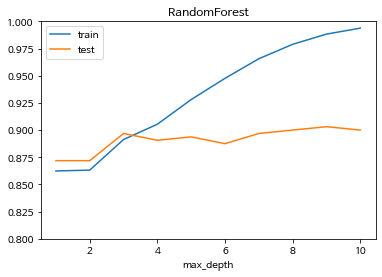

In [49]:
rang = np.linspace(1,10, 10)
score_train = []
score_test = []
for d in rang:
    rfc = RandomForestClassifier(max_depth=d, n_estimators=100, random_state=0).fit(X_train, y_train)
    score_train.append(rfc.score(X_train, y_train))
    score_test.append(rfc.score(X_test, y_test))
    
plt.plot(rang, score_train, label='train')
plt.plot(rang, score_test, label='test')
plt.ylim(0.8,1)
plt.legend()
plt.title("RandomForest")
plt.xlabel("max_depth")



print(np.array(score_train).mean())
print(np.array(score_test).mean())

#estimators에 따른 결과

처음엔 훈련과 테스트가 비슷하다가 훈련세트는 max_depth가 커질수록 과적합됨

테스트 데이터는 처음에 조금 상승하다가 이후로는 비슷한 수준을 유지함

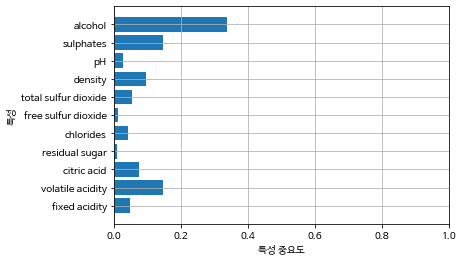

In [50]:
rf = RandomForestClassifier(max_depth=3, random_state=0).fit(X_train, y_train)
plot_feature_importances_wine(rf)

랜덤 포레스트 에서의 특성 중요도. 역시 알코올이 가장 높음

## 그라디언트 부스팅 (Gradient Boosting Classifier)

0.9584050039093042
0.881875


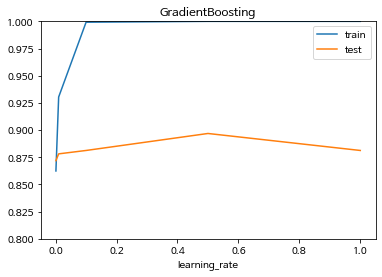

In [51]:

rang = [0.001, 0.01, 0.1, 0.5, 1]
score_test = []
score_train = []
for r in rang:
    GBC = GradientBoostingClassifier(max_depth=5, n_estimators=100, learning_rate=r, random_state=42).fit(X_train, y_train)
    score_test.append(GBC.score(X_test, y_test))
    score_train.append(GBC.score(X_train, y_train))
plt.plot(rang, score_train, label='train')
plt.plot(rang, score_test, label='test')
plt.ylim(0.8,1)
plt.legend()
plt.xlabel("learning_rate")
plt.title("GradientBoosting")



print(np.array(score_train).mean())
print(np.array(score_test).mean())

#learning rate에 따른 결과

0.9476897874083176
0.8922619047619048


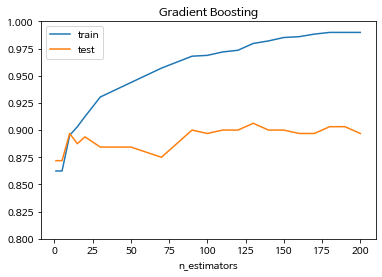

In [52]:
rang = [1,2,5,10,15,20,30,50,70,90,100,110,120,130,140,150,160,170,180,190,200]
score_test = []
score_train = []
for d in rang:
    GBC = GradientBoostingClassifier(max_depth=3, n_estimators=d, random_state=42).fit(X_train, y_train)
    score_test.append(GBC.score(X_test, y_test))
    score_train.append(GBC.score(X_train, y_train))
plt.plot(rang, score_train, label='train')
plt.plot(rang, score_test, label='test')
plt.ylim(0.8,1)
plt.legend()
plt.title("Gradient Boosting")
plt.xlabel("n_estimators")


print(np.array(score_train).mean())
print(np.array(score_test).mean())


#n_estimators에 따른 결과

테스트 데이터는 비슷한 점수대다

훈련 데이터는 급상승하여 과적합된다. > 부스팅 모델은 과적합이 잘 됨.

0.9791243158717748
0.8837499999999998


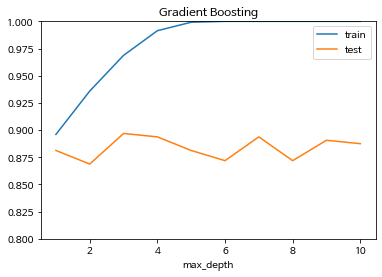

In [53]:
rang = np.linspace(1,10, 10)
score_test = []
score_train = []
for d in rang:
    GBC = GradientBoostingClassifier(max_depth=d, n_estimators=100, random_state=42).fit(X_train, y_train)
    score_test.append(GBC.score(X_test, y_test))
    score_train.append(GBC.score(X_train, y_train))
plt.plot(rang, score_train, label='train')
plt.plot(rang, score_test, label='test')
plt.ylim(0.8,1)
plt.legend()
plt.title("Gradient Boosting")
plt.xlabel("max_depth")


print(np.array(score_train).mean())
print(np.array(score_test).mean())


#max_depth에 따른 결과

역시 훈련 데이터는 깊이가 깊어질수록 과적합된다

테스트 데이터는 조금씩 변동이 있지만 비슷한 점수대를 유지한다

## GaussianNB

In [54]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB().fit(X_train, y_train)


print("train score " ,nb.score(X_train, y_train))
print("test score", nb.score(X_test, y_test))



train score  0.8467552775605942
test score 0.828125


비교적 정확도가 훈련, 테스트 모두 떨어진다

## MLPClassifier

In [109]:
from sklearn.neural_network import MLPClassifier

mp = MLPClassifier(random_state=0, max_iter=2000,hidden_layer_sizes=(100,)).fit(X_train, y_train)
print("train score " ,mp.score(X_train, y_train))
print("test score", mp.score(X_test, y_test))



train score  0.962470680218921
test score 0.875


0.8852071931196245
0.8775625000000001


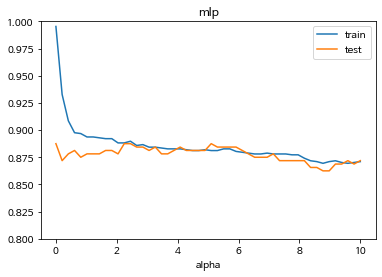

In [56]:

rang = np.linspace(0.0001,10)
score_test = []
score_train = []
for a in rang:
    mlp = MLPClassifier(alpha=a, random_state=0, max_iter=5000).fit(X_train, y_train)
    score_test.append(mlp.score(X_test, y_test))
    score_train.append(mlp.score(X_train, y_train))
    
plt.plot(rang, score_train, label='train')
plt.plot(rang, score_test, label='test')
plt.ylim(0.8,1)
plt.legend()
plt.title("mlp")
plt.xlabel("alpha")


print(np.array(score_train).mean())
print(np.array(score_test).mean())


규제 alpha에 따른 결과. 규제가 강화될수록 훈련 데이터는 과대 적합에서 벗어남

##  정적 평가, 혼돈 매트릭스 (confusion_matrix)

In [57]:
rfc = RandomForestClassifier(random_state=0).fit(X_train, y_train)

pred_rfc = rfc.predict(X_test)
confusion_matrix(y_test, pred_rfc)
# RandomForest에 대한 confusion_matrix

array([[265,  14],
       [ 17,  24]], dtype=int64)

랜덤포레스트 / 혼돈행렬

아래는 모델이 올바르게 예측했는지를 평가하기 위한 값들이다

In [58]:
# 여러 성능 지표를 출력한다
print(classification_report(y_test, pred_rfc))
#밑에 숫자는 0을 기준으로 0.94 맞춤 
#pos 긍정이 아닌 내가 찾고자 하는 답을 pos라고 봄(암환자)

              precision    recall  f1-score   support

           0       0.94      0.95      0.94       279
           1       0.63      0.59      0.61        41

    accuracy                           0.90       320
   macro avg       0.79      0.77      0.78       320
weighted avg       0.90      0.90      0.90       320



- Precision  = 모델이 옳다고 한 것이 실제로 옳은 비율     TP / ( TP + FP ) 
- Recall =  실제 정답인 것들 중, 모델이 정답이라고 예측한 것    TP / TP+FN
- f1-score = Precision과 Recall의 조화평균  (2 x  Precision x Recall ) /  (Precision + Recall)
- support는 이 모델에서 응답한 샘플의 수이다

> precision을 보면 0번 클래스에 대해서는 0.92 / 1번은 0.62
> confusion matrix로 확인했을때 1번의 분류가 제대로 이루어지지 않은 것을 수치로도 확인할 수 있다


> Recall, f1-score도 정확도와 관련있어서 모두 0번 클래스의 값이 좋게 나온다

## Support Vector Classifier (SVC)

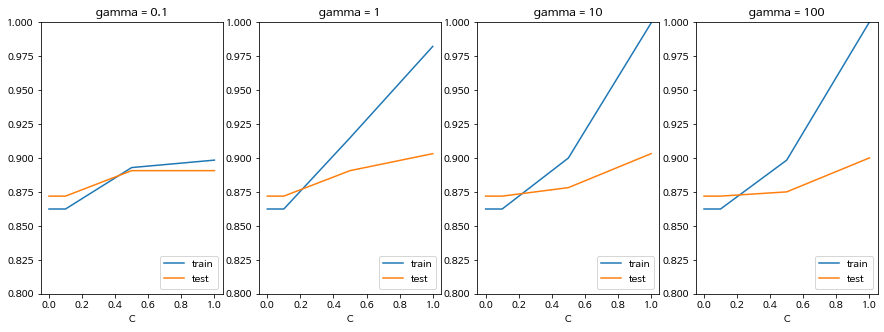

In [59]:

rang = [0.0001, 0.001, 0.01, 0.1, 0.5, 1]
gamma = [0.1,1,10,100]

fig,axes = plt.subplots(1,4,figsize=(15,5))

for g, ax in zip(gamma, axes):
    score_train = []
    score_test = []
    for r in rang:
        svc = SVC(gamma = g, C=r).fit(X_train,y_train)
        score_train.append(svc.score(X_train, y_train))
        score_test.append(svc.score(X_test, y_test))
    ax.plot(rang, score_train, label="train")
    ax.plot(rang, score_test, label="test")
    ax.legend(loc=4)
    ax.set_ylim(0.8,1)
    ax.set_title('gamma = {}'.format(g))
    ax.set_xlabel("C")
#c와 gamma에 따른 결과


C가 커질수록(규제가 약화될수록) 성능이 좋은 것을 확인할 수 있다 / 너무 강한 규제는 패널티의 영향력 증가로 좋지만은 않음



Logistic Regression
--

C= 0.01
Test = 0.86875
Train = 0.8608287724784989
[[275   4]
 [ 38   3]]
C= 1
Test = 0.878125
Train = 0.8788115715402658
[[265  14]
 [ 25  16]]
C= 100
Test = 0.890625
Train = 0.8780297107114934
[[266  13]
 [ 22  19]]


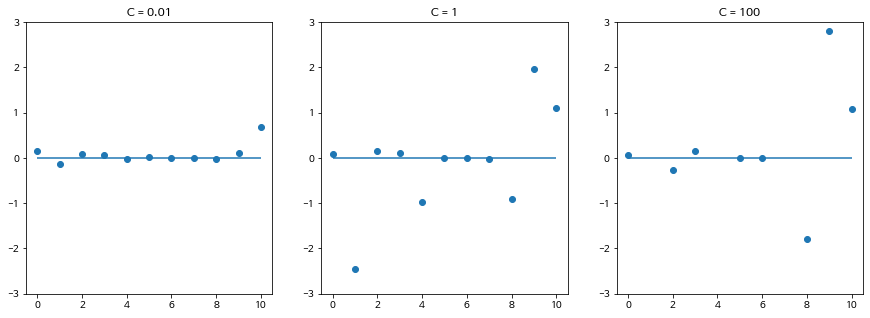

In [206]:

rang =[0.01, 1, 100]
fig,axes = plt.subplots(1,3,figsize=(15,5))

for r,ax in zip(rang,axes):
    lr = LogisticRegression(C=r, max_iter=1000).fit(X_train,y_train)
    print("C=",r)
    print("Test =", lr.score(X_test, y_test))
    print("Train =",lr.score(X_train, y_train))
    print(confusion_matrix(y_test,lr.predict(X_test)))
    ax.set_ylim(-3,3)
    ax.plot(range(X_test.shape[1]), lr.coef_[0], 'o')
    ax.set_title("C = {}".format(r))
    ax.hlines(0,0,10)

In [61]:
print(lr.coef_)

[[ 0.58365586 -0.43607744  0.04173999  0.37871207 -0.40336031  0.04732502
  -0.41304156 -0.57909862 -0.0298354   0.56596307  0.84421916]]


C가 작아져서 규제가 강화될수록 계수가 0에 가까워짐

## Cross validation(교차 검증)

In [90]:
# estimator = 모델, cv는 분할 테스트 숫자
rfc = RandomForestClassifier(random_state=0, n_estimators=10).fit(X_train, y_train)

print(rfc.score(X_test, y_test))
rfc_eval = cross_val_score(rfc, X = X_new, y = y, cv = 5)  
print(rfc_eval)  # 5번의 교차 검증 결과를 보여준다

rfc_eval.mean()

#randomforest

0.884375
[0.878125   0.846875   0.896875   0.840625   0.88401254]


0.8693025078369907

In [89]:
# estimator = 모델, cv는 분할 테스트 숫자
knn = KNeighborsClassifier(weights='distance', n_neighbors=3).fit(X_train, y_train)

print(knn.score(X_test, y_test))
knn_eval = cross_val_score(knn, X = X_new, y = y, cv = 5)  
print(knn_eval)  # 5번의 교차 검증 결과를 보여준다

knn_eval.mean()

#knn

0.884375
[0.859375   0.803125   0.8625     0.784375   0.86520376]


0.8349157523510972

In [91]:
# estimator = 모델, cv는 분할 테스트 숫자
gb = GradientBoostingClassifier(random_state=0, n_estimators=10).fit(X_train, y_train)

print(gb.score(X_test, y_test))
gb_eval = cross_val_score(gb, X = X_new, y = y, cv = 5)  
print(gb_eval)  # 5번의 교차 검증 결과를 보여준다

gb_eval.mean()

#gradientBoosting

0.896875
[0.875      0.875      0.88125    0.875      0.86833856]


0.8749177115987461

In [93]:
# estimator = 모델, cv는 분할 테스트 숫자
dt = tree.DecisionTreeClassifier(random_state=0).fit(X_train, y_train)

print(dt.score(X_test, y_test))
dt_eval = cross_val_score(dt, X = X_new, y = y, cv = 5)  
print(dt_eval)  # 5번의 교차 검증 결과를 보여준다

dt_eval.mean()

#decisionTree

0.846875
[0.853125   0.746875   0.875      0.759375   0.79310345]


0.8054956896551724

Percentile Test
==

분류 성능 평가 (정적)
--

In [110]:
from itertools import cycle
from sklearn import svm, datasets
import sklearn.metrics 
from sklearn.preprocessing import label_binarize
from scipy import interp

In [113]:
X_new.shape, y.shape

((1599, 7), (1599,))

선형모델
--

In [141]:
classifier = LogisticRegression(max_iter=1000)
y_score = classifier.fit(X_train, y_train).decision_function(X_test)#decision_function() 어떤 클래스라고 분류한 확률을 리턴해줌

#print(y_score)

print(classifier.score(X_test, y_test))
y_score = (y_score>0).astype(np.int)


print(confusion_matrix(y_test, classifier.predict(X_test)))
print(np.bincount(y_score))

0.878125
[[266  13]
 [ 26  15]]
[292  28]


로지스틱으로 분류한 결과

decision_function결과가 양수면 클래스1, 음수면 0..

0으로 분류한 데이터 샘플 292개. 이 중 266개가 TP, 26이 FN..
FP = 13, TN = 15

In [140]:
y_score = classifier.fit(X_train, y_train).predict_proba(X_test)
#predict_proba() 어떤 클래스라고 분류한 확률을 리턴해줌

#print(y_score)
y_label = []
for i in range(y_score.shape[0]):
    y_label.append((y_score[i][0] < y_score[i][1]).astype(np.int))

print(classifier.score(X_test, y_test))

print(confusion_matrix(y_test, classifier.predict(X_test)))
print(np.bincount(y_label))

0.878125
[[266  13]
 [ 26  15]]
[292  28]


predict proba로 결과 관찰. / 

decision과 다르게 각각의 클래스에 대한 확률이므로 더 큰 확률값을 따라가도록 분류함

ROC로 성능 평가 (맞춘 순서를 평가)
--

In [133]:
y_score = classifier.fit(X_train, y_train).decision_function(X_test)#decision_function() 어떤 클래스라고 분류한 확률을 리턴해줌


fpr = dict()
tpr = dict()
roc_auc = dict()
fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

#roc_auc는 그래프의 넓이를 구한다. 초반에 빨리 올라가면 면적이 넓다.
#가장 낮은건 평균인 0.5, 최대는 1이 된다.
roc_auc

0.8728909869743858

# ROC그림 실습해보기

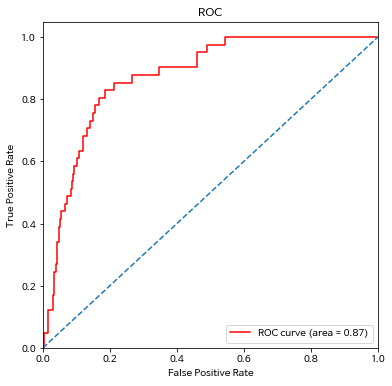

In [134]:
plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, color='r', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")

LogisticRegression의 ROC

In [139]:
y_score = GradientBoostingClassifier().fit(X_train, y_train).decision_function(X_test)#decision_function() 어떤 클래스라고 분류한 확률을 리턴해줌


fpr = dict()
tpr = dict()
roc_auc = dict()
fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

roc_auc

0.8832502841157444

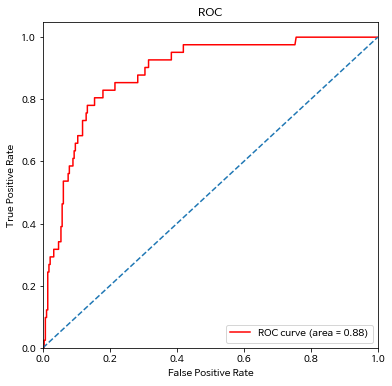

In [136]:
plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, color='r', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")

GradientBoostingClassifier의 ROC

In [149]:
lr = LogisticRegression(max_iter=1000).fit(X_train, y_train)
gb = GradientBoostingClassifier().fit(X_train, y_train)

print("Logistic", lr.score(X_test, y_test))
print("GradientBoosting", gb.score(X_test, y_test))

Logistic 0.878125
GradientBoosting 0.875


# 2. 회귀

In [178]:
def rmse(true,pred): #RMSE값 반환
    return np.sqrt(mean_squared_error(true,pred))

metrics = {'MSE': mean_squared_error,
              'RMSE': rmse,
              'MAE': mean_absolute_error,
              'R2': r2_score}

# RMSE와 MAE의 순서가 바뀌어져 있어서 수정했습니다.
#

def linear_eval(model):
    for i in metrics.keys():
        print(f'{i} : {metrics[i](y_test_, model.predict(X_test_))}')

## 선형 모델

In [179]:
lr = LinearRegression()
lr.fit(X_train_, y_train_)
linear_eval(lr)

MSE : 0.3795971085022988
RMSE : 0.6161145254758232
MAE : 0.48139673183329845
R2 : 0.3468858137200854


In [187]:
ridge = Ridge(alpha=0.001)
ridge.fit(X_train_, y_train_)
linear_eval(ridge)

MSE : 0.37684326150614733
RMSE : 0.613875607518451
MAE : 0.4814497006385282
R2 : 0.3516239334258101


In [181]:
lasso = Lasso(alpha=0.001)
lasso.fit(X_train_, y_train_)
linear_eval(lasso)

MSE : 0.37418901920968467
RMSE : 0.6117099142646657
MAE : 0.48053221810481583
R2 : 0.35619067869023946


## Support Vector Regressor(SVR)

In [182]:

svr = SVR(kernel='rbf',gamma='auto',C=1, epsilon=0.1)
svr.fit(X_train_, y_train_)
linear_eval(svr)

MSE : 0.3927420272166743
RMSE : 0.62669133328671
MAE : 0.4732517815162476
R2 : 0.3242693798812514


## RandomForestRegressor

In [167]:
from sklearn.ensemble import RandomForestRegressor
rfg = RandomForestRegressor(random_state=0).fit(X_train_, y_train_)
linear_eval(rfg)


MSE : 0.28696031250000004
RMSE : 0.5356867671503562
MAE : 0.39028125
R2 : 0.506271658041535


## KNeighborsRegressor

In [168]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor().fit(X_train_, y_train_)
linear_eval(knn)


MSE : 0.49912499999999993
RMSE : 0.7064877918265821
MAE : 0.5418750000000001
R2 : 0.14123260971839524


## GradientBoostingRegressor

In [192]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor().fit(X_train_, y_train_)
linear_eval(gbr)

MSE : 0.3385241705516556
RMSE : 0.5818282998889411
MAE : 0.4569981533185475
R2 : 0.4175536819596489


## test size= 0.2 / 분류

In [69]:
bins = (2.9, 6.5, 8.1)
# 6.5부터 good(1)
group_names = [0, 1]
wine['qual'] = pd.cut(wine['quality'], bins = bins, labels = group_names) 


X_new = wine.drop(['quality', 'qual'], axis = 1)
y_ = wine['quality'] # regression 용
y = wine['qual'] 


X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size = 0.2, random_state = 7) # 분류용 = qual
X_train_, X_test_, y_train_, y_test_ = train_test_split(X_new, y_, test_size = 0.2, random_state = 7) # 회귀용 = quality


sc = StandardScaler().fit(X_train)

X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

X_train_ = sc.transform(X_train_)
X_test_ = sc.transform(X_test_)


print(X_train.shape)
print(X_test.shape)


knn = KNeighborsClassifier().fit(X_train, y_train)
logistic = LogisticRegression().fit(X_train, y_train)
mlp = MLPClassifier(random_state=0,max_iter=5000).fit(X_train, y_train)
svm = SVC(random_state=0).fit(X_train, y_train)

gb = GradientBoostingClassifier(random_state=0).fit(X_train, y_train)
dt = tree.DecisionTreeClassifier(random_state=0).fit(X_train, y_train)
rf= RandomForestClassifier(random_state=0).fit(X_train, y_train)
nb = GaussianNB().fit(X_train, y_train)


print('knn ', knn.score(X_test,y_test))
print('logistic ', logistic.score(X_test,y_test))
print('decisiontree ', dt.score(X_test,y_test))
print('GradientBoosting ', gb.score(X_test,y_test))
print('randomforest ', rf.score(X_test,y_test))
print('gaussiannb ', nb.score(X_test,y_test))
print('svm ', svm.score(X_test,y_test))
print('mlp ', mlp.score(X_test,y_test))



(1279, 11)
(320, 11)
knn  0.878125
logistic  0.88125
decisiontree  0.846875
GradientBoosting  0.89375
randomforest  0.903125
gaussiannb  0.828125
svm  0.8875
mlp  0.8875


### test size = 0.3

In [105]:
# 6.5부터 good(1)

bins = (2.9, 6.5, 8.1)

group_names = [0, 1]
wine['qual'] = pd.cut(wine['quality'], bins = bins, labels = group_names)


X_new = wine.drop(['quality', 'qual'], axis = 1)
y_ = wine['quality'] # regression 용
y = wine['qual'] 


X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size = 0.3, random_state = 7) # 분류용 = qual
X_train_, X_test_, y_train_, y_test_ = train_test_split(X_new, y_, test_size = 0.3, random_state = 7) # 회귀용 = quality


sc = StandardScaler().fit(X_train)

X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

X_train_ = sc.transform(X_train_)
X_test_ = sc.transform(X_test_)


print(X_train.shape)
print(X_test.shape)


knn = KNeighborsClassifier().fit(X_train, y_train)
logistic = LogisticRegression().fit(X_train, y_train)
mlp = MLPClassifier(random_state=0,max_iter=5000).fit(X_train, y_train)
svm = SVC(random_state=0).fit(X_train, y_train)

gb = GradientBoostingClassifier(random_state=0).fit(X_train, y_train)
dt = tree.DecisionTreeClassifier(random_state=0).fit(X_train, y_train)
rf= RandomForestClassifier(random_state=0).fit(X_train, y_train)
nb = GaussianNB().fit(X_train, y_train)


print('knn ', knn.score(X_test,y_test))
print('logistic ', logistic.score(X_test,y_test))
print('decisiontree ', dt.score(X_test,y_test))
print('GradientBoosting ', gb.score(X_test,y_test))
print('randomforest ', rf.score(X_test,y_test))
print('gaussiannb ', nb.score(X_test,y_test))
print('svm ', svm.score(X_test,y_test))
print('mlp ', mlp.score(X_test,y_test))



(1119, 11)
(480, 11)
knn  0.8645833333333334
logistic  0.8854166666666666
decisiontree  0.8604166666666667
GradientBoosting  0.8875
randomforest  0.9041666666666667
gaussiannb  0.8291666666666667
svm  0.8854166666666666
mlp  0.8895833333333333


In [106]:
# 7부터 good(1)

bins = (2.9, 7, 8.1)

group_names = [0, 1]
wine['qual'] = pd.cut(wine['quality'], bins = bins, labels = group_names) 

X_new = wine.drop(['quality', 'qual'], axis = 1)
y_ = wine['quality'] # regression 용
y = wine['qual'] 

print(wine['qual'].value_counts())

X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size = 0.3, random_state = 7) # 분류용 = qual
X_train_, X_test_, y_train_, y_test_ = train_test_split(X_new, y_, test_size = 0.3, random_state = 7) # 회귀용 = quality


sc = StandardScaler().fit(X_train)

X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

X_train_ = sc.transform(X_train_)
X_test_ = sc.transform(X_test_)

knn = KNeighborsClassifier().fit(X_train, y_train)
logistic = LogisticRegression().fit(X_train, y_train)
mlp = MLPClassifier(random_state=0,max_iter=1000).fit(X_train, y_train)
svm = SVC(random_state=0).fit(X_train, y_train)

gb = GradientBoostingClassifier(random_state=0).fit(X_train, y_train)
dt = tree.DecisionTreeClassifier(random_state=0).fit(X_train, y_train)
rf= RandomForestClassifier(random_state=0).fit(X_train, y_train)
nb = GaussianNB().fit(X_train, y_train)


print('knn ', knn.score(X_test,y_test))
print('logistic ', logistic.score(X_test,y_test))
print('decisiontree ', dt.score(X_test,y_test))
print('GradientBoosting ', gb.score(X_test,y_test))
print('randomforest ', rf.score(X_test,y_test))
print('gaussiannb ', nb.score(X_test,y_test))
print('svm ', svm.score(X_test,y_test))
print('mlp ', mlp.score(X_test,y_test))



0    1581
1      18
Name: qual, dtype: int64
knn  0.9895833333333334
logistic  0.9875
decisiontree  0.9708333333333333
GradientBoosting  0.9833333333333333
randomforest  0.9916666666666667
gaussiannb  0.9625
svm  0.9895833333333334
mlp  0.9895833333333334


In [107]:
bins = (2.9, 5, 8.1)
# 5부터 good(1)
group_names = [0, 1]
wine['qual'] = pd.cut(wine['quality'], bins = bins, labels = group_names)


X_new = wine.drop(['quality', 'qual'], axis = 1)
y_ = wine['quality'] # regression 용
y = wine['qual'] 

print(wine['qual'].value_counts())

X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size = 0.3, random_state = 7) # 분류용 = qual
X_train_, X_test_, y_train_, y_test_ = train_test_split(X_new, y_, test_size = 0.3, random_state = 7) # 회귀용 = quality


sc = StandardScaler().fit(X_train)

X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

X_train_ = sc.transform(X_train_)
X_test_ = sc.transform(X_test_)

knn = KNeighborsClassifier().fit(X_train, y_train)
logistic = LogisticRegression().fit(X_train, y_train)
mlp = MLPClassifier(random_state=0,max_iter=5000).fit(X_train, y_train)
svm = SVC(random_state=0).fit(X_train, y_train)

gb = GradientBoostingClassifier(random_state=0).fit(X_train, y_train)
dt = tree.DecisionTreeClassifier(random_state=0).fit(X_train, y_train)
rf= RandomForestClassifier(random_state=0).fit(X_train, y_train)
nb = GaussianNB().fit(X_train, y_train)


print('knn ', knn.score(X_test,y_test))
print('logistic ', logistic.score(X_test,y_test))
print('decisiontree ', dt.score(X_test,y_test))
print('GradientBoosting ', gb.score(X_test,y_test))
print('randomforest ', rf.score(X_test,y_test))
print('gaussiannb ', nb.score(X_test,y_test))
print('svm ', svm.score(X_test,y_test))
print('mlp ', mlp.score(X_test,y_test))



1    855
0    744
Name: qual, dtype: int64
knn  0.7458333333333333
logistic  0.7416666666666667
decisiontree  0.7729166666666667
GradientBoosting  0.7875
randomforest  0.83125
gaussiannb  0.7229166666666667
svm  0.76875
mlp  0.7833333333333333


In [108]:
# 박스플롯으로 살펴봤을때 품질에 따라 상승, 감소하는 정도가 잘 나타났던 
#특성들만 모아서 test size=0.2로 다시 테스트.

bins = (2.9, 6.5, 8.1)
# 6.5부터 good(1)
group_names = [0, 1]
wine['qual'] = pd.cut(wine['quality'], bins = bins, labels = group_names) 


X_new = wine.drop(['quality', 'qual', 'residual sugar','density', 'free sulfur dioxide', 'total sulfur dioxide'], axis = 1)
y_ = wine['quality'] # regression 용
y = wine['qual'] 

print(wine['qual'].value_counts())

X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size = 0.2, random_state = 7) # 분류용 = qual
X_train_, X_test_, y_train_, y_test_ = train_test_split(X_new, y_, test_size = 0.2, random_state = 7) # 회귀용 = quality


sc = StandardScaler().fit(X_train)

X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

X_train_ = sc.transform(X_train_)
X_test_ = sc.transform(X_test_)

knn = KNeighborsClassifier().fit(X_train, y_train)
logistic = LogisticRegression().fit(X_train, y_train)
mlp = MLPClassifier(random_state=0,max_iter=5000).fit(X_train, y_train)
svm = SVC(random_state=0).fit(X_train, y_train)

gb = GradientBoostingClassifier(random_state=0).fit(X_train, y_train)
dt = tree.DecisionTreeClassifier(random_state=0).fit(X_train, y_train)
rf= RandomForestClassifier(random_state=0).fit(X_train, y_train)
nb = GaussianNB().fit(X_train, y_train)


print('knn ', knn.score(X_test,y_test))
print('logistic ', logistic.score(X_test,y_test))
print('decisiontree ', dt.score(X_test,y_test))
print('GradientBoosting ', gb.score(X_test,y_test))
print('randomforest ', rf.score(X_test,y_test))
print('gaussiannb ', nb.score(X_test,y_test))
print('svm ', svm.score(X_test,y_test))
print('mlp ', mlp.score(X_test,y_test))



0    1382
1     217
Name: qual, dtype: int64
knn  0.875
logistic  0.878125
decisiontree  0.8625
GradientBoosting  0.875
randomforest  0.896875
gaussiannb  0.8375
svm  0.875
mlp  0.875


## test_size = 0.3 / 회귀

In [189]:
bins = (2.9, 6.5, 8.1)
# 6.5부터 good(1)
group_names = [0, 1]
wine['qual'] = pd.cut(wine['quality'], bins = bins, labels = group_names) 

X_new = wine.drop(['quality', 'qual'], axis = 1)
y_ = wine['quality'] # regression 용
y = wine['qual'] 

print(wine['qual'].value_counts())
X_train_, X_test_, y_train_, y_test_ = train_test_split(X_new, y_, test_size = 0.3, random_state = 7) # 회귀용 = quality

print("Linear")
lr = LinearRegression().fit(X_train_, y_train_)
linear_eval(lr)
print("\nRidge")
rg = Ridge(alpha=0.001).fit(X_train_, y_train_)
linear_eval(rg)

print("\nLasso")
ls = Lasso(alpha=0.001).fit(X_train_, y_train_)
linear_eval(ls)

print("\nKNN")
knn = KNeighborsRegressor().fit(X_train_, y_train_)
linear_eval(knn)

print("\nRandomForest")
rfg = RandomForestRegressor().fit(X_train_, y_train_)
linear_eval(rfg)

print("\nSVR")
svr = SVR().fit(X_train_, y_train_)
linear_eval(svr)

print("\nGradientBoosting")
gbr = GradientBoostingRegressor().fit(X_train_, y_train_)
linear_eval(gbr)


0    1382
1     217
Name: qual, dtype: int64
Linear
MSE : 0.42816456161020106
RMSE : 0.6543428471452875
MAE : 0.5073574335152197
R2 : 0.32660881529195107

Ridge
MSE : 0.4275842741617416
RMSE : 0.6538992844175177
MAE : 0.5080541854142235
R2 : 0.32752145610211014

Lasso
MSE : 0.4287209155186099
RMSE : 0.6547678332955964
MAE : 0.5087762869243557
R2 : 0.3257338156981233

KNN
MSE : 0.5343333333333332
RMSE : 0.7309810759064377
MAE : 0.56
R2 : 0.15963302752293584

RandomForest
MSE : 0.3529972916666667
RMSE : 0.5941357518839164
MAE : 0.42922916666666666
R2 : 0.4448273263433813

SVR
MSE : 0.5325079362271237
RMSE : 0.7297314137592842
MAE : 0.555468646235866
R2 : 0.16250390108447132

GradientBoosting
MSE : 0.3962691437037235
RMSE : 0.6294991212890797
MAE : 0.48754215743519796
R2 : 0.37677198893254493


In [194]:
# 0.3 + stratify=y

bins = (2.9, 6.5, 8.1)
# 6.5부터 good(1)
group_names = [0, 1]
wine['qual'] = pd.cut(wine['quality'], bins = bins, labels = group_names) 

X_new = wine.drop(['quality', 'qual'], axis = 1)
y_ = wine['quality'] # regression 용
y = wine['qual'] 

print(wine['qual'].value_counts())
X_train_, X_test_, y_train_, y_test_ = train_test_split(X_new, y_, test_size = 0.3, stratify=y_, random_state = 7) # 회귀용 = quality

print("Linear")
lr = LinearRegression().fit(X_train_, y_train_)
linear_eval(lr)
print("\nRidge")
rg = Ridge(alpha=0.001).fit(X_train_, y_train_)
linear_eval(rg)

print("\nLasso")
ls = Lasso(alpha=0.001).fit(X_train_, y_train_)
linear_eval(ls)

print("\nKNN")
knn = KNeighborsRegressor().fit(X_train_, y_train_)
linear_eval(knn)

print("\nRandomForest")
rfg = RandomForestRegressor().fit(X_train_, y_train_)
linear_eval(rfg)

print("\nSVR")
svr = SVR().fit(X_train_, y_train_)
linear_eval(svr)

print("\nGradientBoosting")
gbr = GradientBoostingRegressor().fit(X_train_, y_train_)
linear_eval(gbr)


0    1382
1     217
Name: qual, dtype: int64
Linear
MSE : 0.4021379989079101
RMSE : 0.6341435160181882
MAE : 0.4841043935017259
R2 : 0.37973158193551493

Ridge
MSE : 0.4022518035833375
RMSE : 0.6342332406799075
MAE : 0.48418758385654154
R2 : 0.37955604655664643

Lasso
MSE : 0.4045803701173514
RMSE : 0.6360663252502458
MAE : 0.48548933263620303
R2 : 0.37596440317966373

KNN
MSE : 0.5921666666666667
RMSE : 0.7695236621876332
MAE : 0.5716666666666667
R2 : 0.08662627615062779

RandomForest
MSE : 0.31794083333333334
RMSE : 0.5638624241189808
MAE : 0.40395833333333336
R2 : 0.5095995447698746

SVR
MSE : 0.5312922405000224
RMSE : 0.7288979630236474
MAE : 0.5391342336221768
R2 : 0.1805206211802166

GradientBoosting
MSE : 0.3637867517553341
RMSE : 0.6031473715066112
MAE : 0.4636049995435734
R2 : 0.43888557252265126
